# <u>Salifort Motors: Predicting Employee Turnover</u>

## Business Context
Salifort Motors is facing a growing challenge with employee turnover. Leadership is concerned about the cost and disruption caused by high attrition rates and is seeking data-driven strategies to improve employee retention.

## Business Problem
The goal of this project is to analyze HR survey data and build a model that predicts whether an employee is likely to leave the company. This insight will help Salifort Motors understand the drivers of turnover and take proactive steps to improve retention and employee satisfaction.

## Project Objective
- Identify key factors contributing to employee turnover
- Build a classification model to predict which employees are at risk of leaving
- Provide actionable insights and recommendations to HR leadership

## Tools and Techniques
This analysis is conducted using Python (Pandas, Seaborn, Scikit-learn), Jupyter Notebook, and visualization tools such as Matplotlib and potentially Tableau. The approach will involve:
- Exploratory Data Analysis (EDA)
- Feature engineering
- Logistic regression and machine learning models (e.g., Random Forest)
- Model evaluation and business recommendations

---


## <u>1. Dataset Overview</u>

The dataset contains self-reported information from **14,999 employees** at Salifort Motors. Each row represents one employee, with multiple features that may influence turnover. 

This initial view helps us understand the structure of the data and spot any immediate issues such as unclear column names, unusual values, or potential preprocessing needs.

We begin by checking:
* The shape of the dataset
* A preview of the first few rows


In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/HR_capstone_dataset.csv')

# Preview the dataset
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


---

## 2. <u>Initial Data Audit: Structure and Cleanliness</u>

Before conducting deeper exploratory analysis, I'll start with a basic data audit.

### Goals:
- Standardize column names for clarity and consistency.
- Confirm appropriate data types for each column.
- Check for missing or null values that may affect analysis or model training.

This step ensures I will be working with a clean and well-structured dataset, setting the foundation for effective EDA and modeling.


In [ ]:
# Step 1: Standardize column names (snake_case)
df.columns = df.columns.str.lower()

# Step 2: Check updated column names and data types
print('Data types and non-null values:\n')
print(df.info())

# Step 3: Check for missing values
print('\nMissing values in each column:\n')
print(df.isnull().sum())


Data types and non-null values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

Missing values in each column:

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0

### Column Name Fix

While reviewing the column names, I noticed that `average_montly_hours` was misspelled (missing an "h" in "monthly"). Since clear and correct naming is important both for readability and for avoiding future bugs, I’ve renamed this column to `average_monthly_hours` for the rest of the analysis.


### Summary of Initial Data Auditing

The dataset appears to be well-structured and clean:

* **No missing values** were found in any of the columns.
* All **numeric columns** have appropriate types (`int64` or `float64`), which will support statistical and model-building operations.
* **Categorical columns**:
  - `department` and `salary` are correctly stored as `object` types and will be encoded later during preprocessing.

This gives me confidence to proceed directly into exploratory data analysis (EDA) without requiring any immediate data cleaning or imputation.


***Update:** A last minute minor spelling error was identified in one of the column name. This was the `average_montly_hours`. The ***'h'*** was missing from ***'monthly'***. I have fixed it in the below code.*

In [8]:
# Fix typo in the column name
df.rename(columns={'average_montly_hours' : 'average_monthly_hours'}, inplace=True)

---

## <u>Understanding the Target Variable and Summary Stats</u>

I'll begin EDA by looking at the distribution of the target variable `left`, which indicates whether an employee left the company (1) or stayed (0). This helps me assess class balance, which will be critical for model training later.

Additionally, I’ll generate basic descriptive statistics for all numerical features to:
* Understand their central tendencies
* Identify potential outliers or skewness
* Spot any data entry anomalies

This step gives me a quantitative snapshot of the data before I visualize it.


In [4]:
# Check the class distribution for the target variable
print('Distribution of Target(left)')
print(df['left'].value_counts(normalize=True))
print('\n')

# Descriptive statistics for all numeric features
df.describe()

Distribution of Target(left)
left
0    0.761917
1    0.238083
Name: proportion, dtype: float64




,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Interpretation of the Target variable, `left`, distribution:
* ~**76% of employees stayed** (`left = 0`)
* ~**24% of employees left** (`left = 1`)

This indicates **class imbalance**, but not extreme. Still, I'll keep it in mind when evaluating models—especially with metrics like **recall**, **precision**, and **ROC-AUC** rather than just accuracy.


### Summary of Descriptive Statistics (Key Observations)

* **satisfaction_level** ranges from 0.09 to 1.0, with a **median around 0.64**.  
  ⟶ Suggests possible dissatisfaction for some who may have left.
  
* **number_project** ranges from **2 to 7**, mean ~3.8.  
  ⟶ Could explore whether being under- or over-burdened correlates with attrition.

* **average_monthly_hours** ranges from **96 to 310**.  
  ⟶ Some employees might be overworked (outliers over 250?), worth visualizing.

* **time_spend_company** ranges from **2 to 10 years**, with a **mean ~3.5**.  
  ⟶ Check whether attrition increases with tenure.

* **promotion_last_5years** has a very low mean (~0.02).  
  ⟶ Promotions are rare. Could lack of promotion be tied to attrition?

* **work_accident** is binary; only ~14% had accidents.


These results help guide my **next step: visual**

---


## <u>Exploring Relationships: Satisfaction Level vs Turnover</u>

One of the first things I want to explore is whether employee satisfaction has a measurable relationship with turnover. Intuitively, I expect employees who are less satisfied to be more likely to leave—but I want to verify that with data.

This is an important early step because it can help inform HR policies, such as engagement initiatives or management training. I'll use a boxplot to visualize how satisfaction levels differ between employees who left and those who stayed.


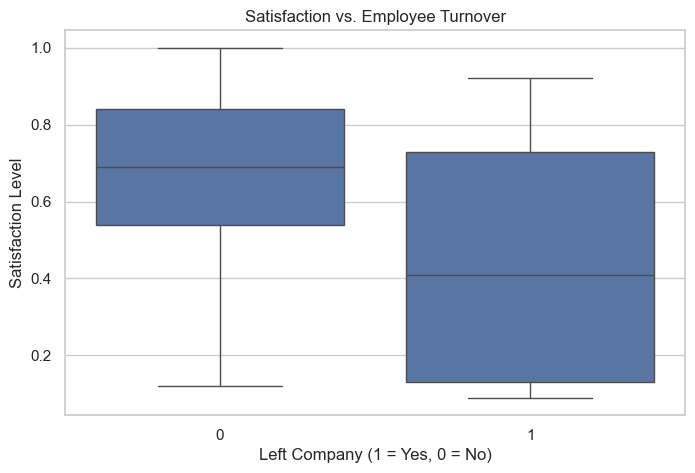

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a style for better aesthetics
sns.set_theme(style='whitegrid')

# Create the box plot
plt.figure(figsize = (8, 5))
sns.boxplot(data = df, x = 'left', y = 'satisfaction_level')
plt.title('Satisfaction vs. Employee Turnover')
plt.xlabel('Left Company (1 = Yes, 0 = No)')
plt.ylabel('Satisfaction Level')
plt.show()

### Summary of relationship between Satifaction Level and Turnover:

This plot confirms what I expected—**there’s a clear difference in satisfaction levels between employees who stayed and those who left**.

Employees who stayed (`left = 0`) generally report **higher satisfaction**, clustering between ~0.6 and 0.9. On the other hand, those who left (`left = 1`) have a **much wider spread**, but the median is clearly lower—around 0.4. Some left even with high satisfaction, which tells me turnover isn’t *only* about being unhappy.

From an ethical standpoint, I’m cautious not to assume causation here. Low satisfaction correlates with attrition, but there could be confounding factors—like poor work-life balance or lack of advancement—that I’ll need to explore further.

Still, this is a strong signal that satisfaction level should be considered an important feature in the predictive model.

---


## <u>Exploring Relationships: Work Hours (Average Monthly Hours vs Turnover)</u>

Next, I want to investigate whether the number of hours an employee works each month is related to whether they leave the company.

My hypothesis going in is that either **overwork (burnout)** or **underutilization (lack of engagement)** could both be possible drivers of turnover. I’m using a boxplot again here because it lets me easily compare distributions between the two groups.


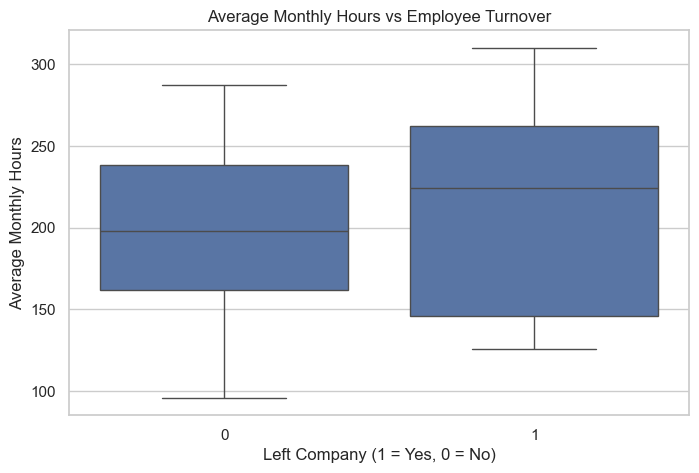

In [9]:
# Plot average monthly hours vs turnover
plt.figure(figsize = (8, 5))
sns.boxplot(data = df, x = 'left', y = 'average_monthly_hours')
plt.title('Average Monthly Hours vs Employee Turnover')
plt.xlabel('Left Company (1 = Yes, 0 = No)')
plt.ylabel('Average Monthly Hours')
plt.show()


### Summary of relationship between Workload and Turnover

This result is pretty eye-opening.

Employees who **left the company** seem to have **higher average monthly hours** than those who stayed. Not only is their median noticeably higher, but the upper quartile stretches much further—some worked close to 310 hours/month, which is way above typical full-time expectations.

To me, this suggests that **overwork may be a key driver of turnover** at Salifort Motors. It might not be the only factor, but it's a strong candidate for further investigation.

Ethically, I’m careful not to generalize that long hours *always* lead to attrition—it’s possible that high performers or those on demanding projects could have higher workloads by choice. But when combined with other features like satisfaction or lack of promotion, this could point toward burnout risk.

This variable is almost certainly going to be useful in the predictive model.

---


## <u>Exploring Relationships: Number of Projects vs Turnover</u>

After looking at satisfaction and workload, I want to explore how the **number of projects** an employee is assigned relates to turnover.

My hypothesis here is that there might be a **U-shaped trend**—where both underutilized (too few projects) and overworked (too many projects) employees are more likely to leave. If that turns out to be true, it could reflect poor resource balancing within teams or departments.


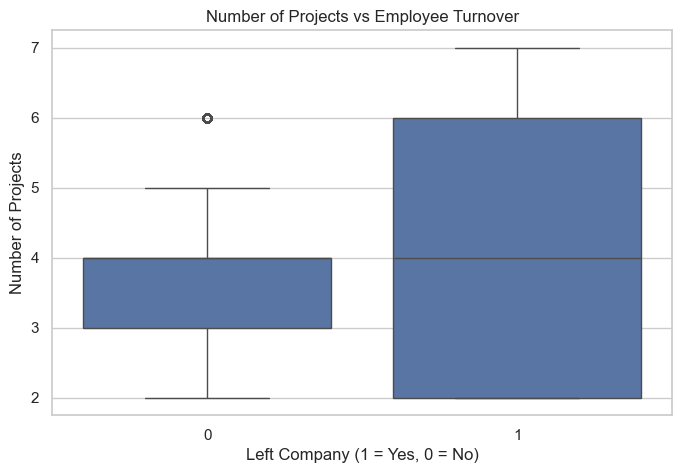

In [10]:
# Plot number of projects vs turnover
plt.figure(figsize = (8, 5))
sns.boxplot(data = df, x = 'left', y = 'number_project')
plt.title('Number of Projects vs Employee Turnover')
plt.xlabel('Left Company (1 = Yes, 0 = No)')
plt.ylabel('Number of Projects')
plt.show()

### Summary of of relationship between Project Load and Attrition

This result is pretty interesting. Employees who left the company tend to be spread across **both the low and high ends** of project count, while those who stayed are mostly clustered around 3 to 5 projects.

This seems to support my earlier hunch: both **underutilization (2 projects)** and **possible overburdening (6-7 projects)** are common among employees who left.

From a business perspective, this might suggest a lack of project load balancing. Some employees may not feel challenged enough, while others could be overwhelmed. Either scenario can impact engagement and morale.

Ethically, this is a reminder that "more isn’t always better." Over-assignment may drive short-term productivity but lead to long-term attrition. This insight could be useful for HR when evaluating team capacity planning.

---

## <u>Exploring Relationships: Tenure vs Turnover- Time Spend at the Company</u>

Next I want to explore whether **tenure**, *(i.e., the number of years an employee has been at Salifort Motors)* has any relationship with whether they leave.

I'm curious if there is a specific tenure "danger zone" where attrition spikes. For example, maybe employees are more likely to leave after a certain point if growth or recognition does not follow. Alternatively, maybe newer employees leave if they don't integrate well. 

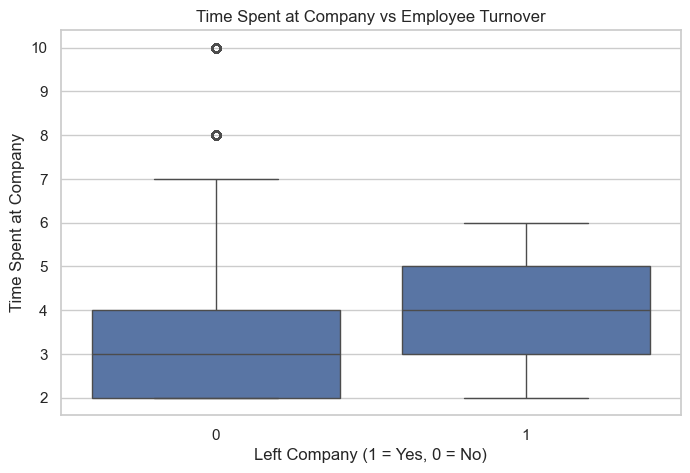

In [27]:
# Plot time spent at company vs turnover
plt.figure(figsize = (8, 5))
sns.boxplot(data = df, x = 'left', y = 'time_spend_company')
plt.title('Time Spent at Company vs Employee Turnover')
plt.xlabel('Left Company (1 = Yes, 0 = No)')
plt.ylabel('Time Spent at Company')
plt.show()

### Summary of relationship between Tenure and Turnover

This one really surprised me.

Employees who **left** the company tend to have a **higher median tenure** than those who stayed. In fact, there seems to be a cluster around the **4-6 year range** for those who exited, while the people who stayed are more tightly grouped under 4 years.

My interpretation here is that **some employees may be hitting a ceiling** around the 4-5 year mark. Maybe they are not seeing advancement, salary growth, or recognition. That might lead to frustration and ultimately, attrition.

From an ethical perspective, this reinforces how important it is to **act on engagement and development data early**, not just when people are already on their way out. If I were part of Salifort’s HR team, I would want to dig deeper into what happens during years 3-6 and whether that’s a make-or-break period for career growth or satisfaction.

---

## <u>Exploring Relationships: Career Advancement vs. Turnover - Promotion in the last 5 Years</u>

Now I want to explore whether getting promoted has any relationship with employee retention. The `promotion_last_5years` column tells me if an employee received a promotion in the past 5 years (1 = yes, 0 = no).

My assumption going in is that employees **without a promotion** might be more likely to leave. If that holds true, it could point to organizational stagnation or missed recognition as key drivers of attrition.

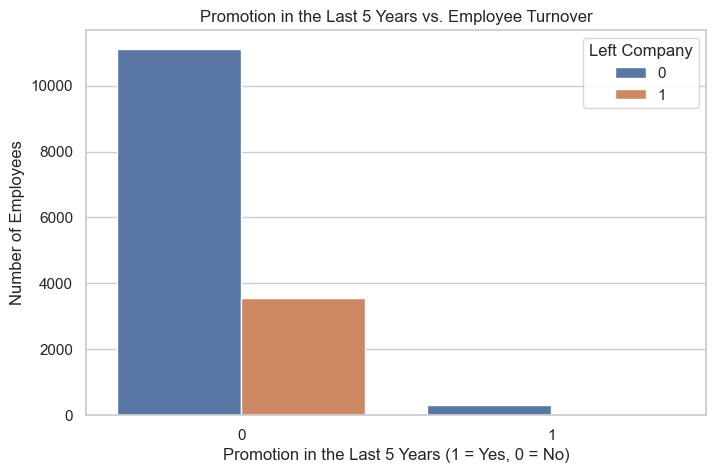

In [28]:
plt.figure(figsize = (8, 5))

sns.countplot(data = df, x = 'promotion_last_5years', hue = 'left')
plt.title('Promotion in the Last 5 Years vs. Employee Turnover')
plt.xlabel('Promotion in the Last 5 Years (1 = Yes, 0 = No)')
plt.ylabel('Number of Employees')
plt.legend(title = 'Left Company')
plt.show()

### Summary of relationship between Promotions and Retention

This one jumps off the screen.

Almost **no employees who received a promotion in the last 5 years** left the company. Meanwhile, a significant portion of those who *didn’t* get promoted ended up leaving. That confirms what I suspected: **career growth is a huge retention lever**.

A couple of nuances I noticed:
* The dataset is **heavily imbalanced**—very few employees got promoted at all. That might mean promotions are rare at Salifort Motors.
* It's possible that even a small effort to recognize or promote high performers could drastically reduce attrition risk.

From an ethical standpoint, this result reminds me that promotion data can reflect **systemic access issues**—it’s worth asking if certain roles or departments are being overlooked. Also, just because someone didn’t leave *yet*, doesn’t mean they’re satisfied. This model helps predict risk, but real employee experiences are more complex.

Still, this is a strong candidate feature for my model.

---

## <u>Correlation Heatmap: Numeric Features Relationships</u>

Before building any model, I want to undestand how the numeric features interact with each other. This helps me:
* Spot **strong correlations** with the target ('left')
* Detect **multicollinearity** (features that are too similar to each other)
* Identify potential **redundant or misleading variables**

I am using a correlation heatmap here because it gives me a quick way to see these patterns visually.

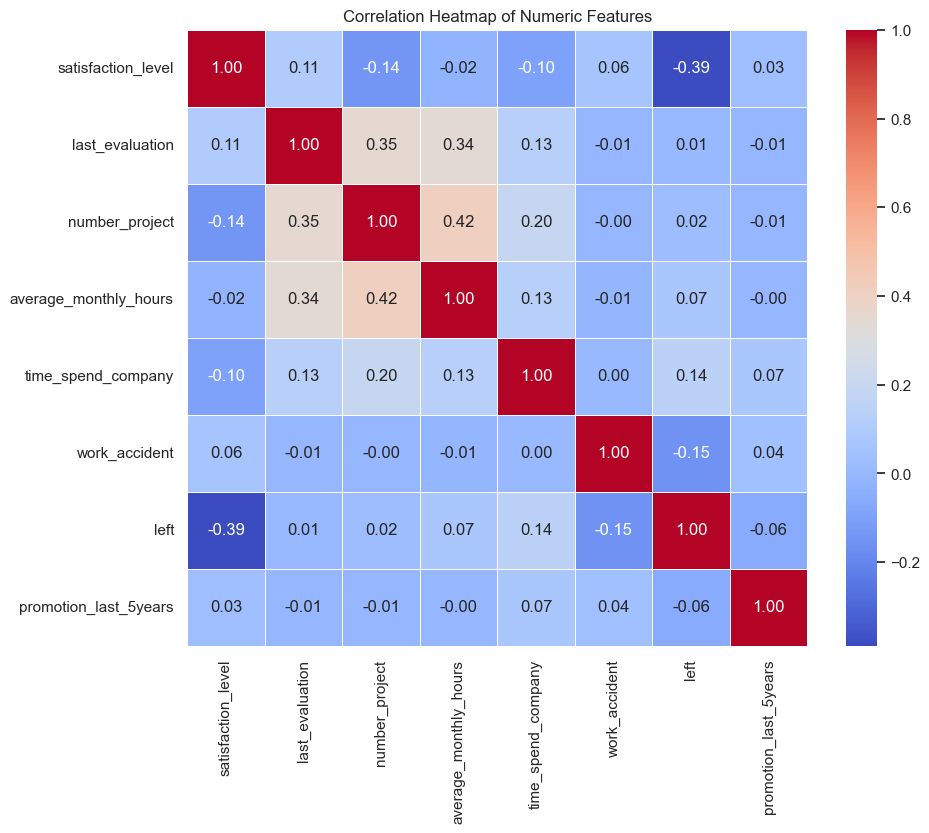

In [29]:
# Calcualte Correlation Matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

###  Summary of Correlation Heatmap Insights

Looking at this heatmap, a few patterns stand out that validate what I’ve already seen—and also offer a few surprises.

####  Correlations with Turnover (`left`)
- `satisfaction_level` has the **strongest negative correlation** with leaving (-0.39). That fits everything I’ve seen so far - dissatisfied employees are more likely to leave.
- `time_spend_company` and `average_monthly_hours` have small **positive correlations** (~0.14), suggesting that employees with more tenure and heavier workloads might be at risk.
- Surprisingly, `last_evaluation` and `number_project` show **almost no correlation** with turnover directly. I was expecting a bit more, but maybe they act more as interaction effects in models.

####  Feature Redundancy Check
- `number_project` and `average_monthly_hours` are **moderately correlated (0.42)**, which makes sense, i.e., more projects probably mean more hours.
- `last_evaluation` is also **somewhat correlated with both**, possibly suggesting that high workload might lead to better evaluations, - but that doesn’t seem to reduce attrition.

####  Modeling Implications
No variables show dangerously high multicollinearity (e.g., > 0.8), so I probably don’t need to drop any features outright. But I’ll keep an eye on the `number_project` + `average_monthly_hours` relationship when I build models. They may carry similar signals.

This heatmap confirms that `satisfaction_level`, `time_spend_company`, and `promotion_last_5years` are particularly important signals, and will likely be strong predictors.

---


## <u>Exploring Relationships: Department vs Turnover</u>

Now I want to explore whether turnover varies across different departments at Salifort Motors. Some teams might have higher pressure, less recognition, or different work cultures—so this could reveal useful patterns.

This kind of insight is especially helpful for HR teams looking to implement **targeted retention efforts** rather than one-size-fits-all policies.


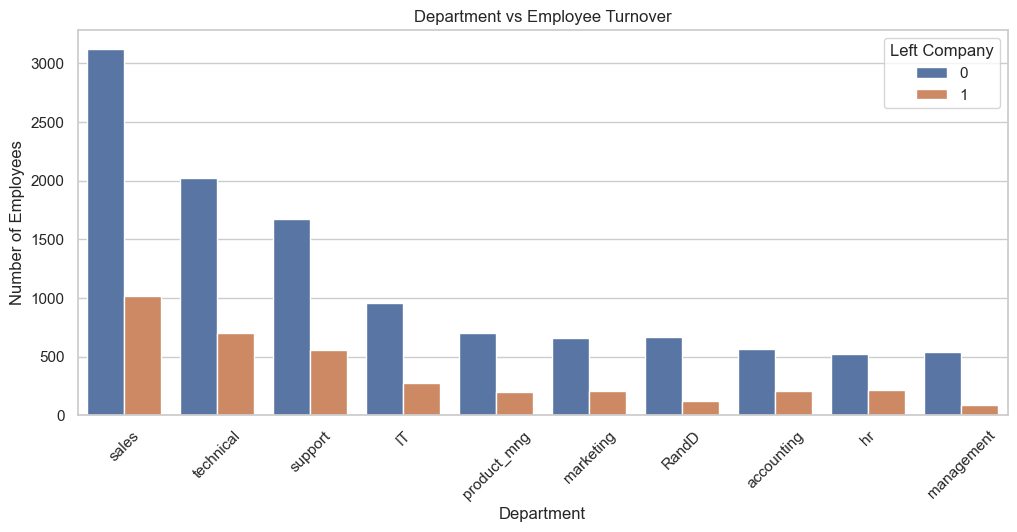

In [35]:
plt.figure(figsize = (12, 5))

sns.countplot(data = df , x = 'department', hue = 'left', order = df['department'].value_counts().index)
plt.title('Department vs Employee Turnover')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title = 'Left Company')
plt.xticks(rotation = 45)
plt.show()

### Summary of relationship between Department and Turnover (Absolute View)

This chart shows the **absolute number of employees who left**, broken down by department. It looks almost linear at first glance, but that’s because departments like **sales, technical, and support** simply have the most people.

Still, there’s something worth noticing:
- Departments like **sales and support** have *visibly high* turnover in raw numbers, and even when accounting for size, they seem to have proportionally more leavers than, say, **R&D** or **management**.
- Interestingly, **HR and accounting** also show noticeable attrition for their size.

To get a true sense of which teams are struggling with retention, I’d want to calculate **percentage turnover per department**—which I might do in the next round of analysis.

This result doesn’t yet prove anything conclusive, but it’s a strong case for segmenting retention strategies by department.


Let me calculate the **percentage of employees who left**. This might reveal a better perspective...




In [ ]:
# Percent Turnover by Department
(df.groupby('left')['department'].value_counts()/df['department'].value_counts())*100

left  department 
0     sales          75.507246
      technical      74.375000
      support        75.100942
      IT             77.750611
      product_mng    78.048780
      RandD          84.625159
      marketing      76.340326
      accounting     73.402868
      management     85.555556
      hr             70.906631
1     sales          24.492754
      technical      25.625000
      support        24.899058
      IT             22.249389
      hr             29.093369
      accounting     26.597132
      marketing      23.659674
      product_mng    21.951220
      RandD          15.374841
      management     14.444444
Name: count, dtype: float64

### Digging Deeper: Percent Turnover by Department

To get a clearer picture, I calculated the **percentage of employees who left** in each department. This helps account for department size and focuses on actual turnover rates.

Here’s what I found:
* Departments like **support**, **sales**, and **technical** all had ~25% attrition—indicating real retention challenges, even after adjusting for size.
* On the flip side, **management** and **R&D** had very low turnover rates, around 15-19%.

This deeper analysis confirms that certain departments may benefit from **targeted retention strategies**, especially in high-contact or high-pressure functions like support and sales.

---


##  <u>Exploring Relationships: Salary vs Turnover</u>

Finally, I want to check if there's a relationship between **employee salary level** and turnover. The `salary` column is categorized into `low`, `medium`, and `high`.

This analysis can help reveal if compensation plays a role in why employees leave—and whether lower-paid employees feel undervalued or under-recognized.

I'll be careful with this one, because salary is often tied to job level and role type. While the data might suggest a trend, it doesn’t tell the full story of each employee’s compensation, cost of living, or satisfaction.


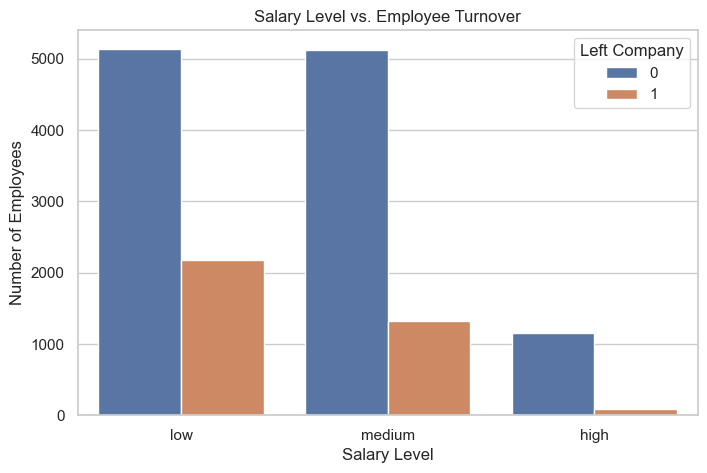

In [54]:
# Countplot of salary vs turnover
plt.figure(figsize = (8, 5))
sns.countplot(data = df , x = 'salary', hue = 'left', order = ['low', 'medium', 'high'])
plt.title('Salary Level vs. Employee Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title = 'Left Company')
plt.show()

### Summary of relationship between Salary and Turnover
>
This result doesn't shock me, but it definitely reinforces a common trend—**lower-paid employees are more likely to leave**.

From this plot:
- Employees with **low salaries** have the **highest attrition count**.
- Those earning **medium salaries** also show noticeable turnover.
- And employees with **high salaries** barely leave at all.

It’s tempting to interpret this as “pay more and people stay”—but I don’t want to oversimplify it. Salary is tied to job role, seniority, and possibly even access to advancement. It could be that higher-paid roles also come with more autonomy, benefits, or stability that support retention.

From an ethical perspective, this highlights a few things:
- **Equity in compensation** could be a powerful lever for retention.
- It also makes me wonder whether pay gaps across departments or demographics exist (though this dataset doesn’t capture that).

This feature will likely be a valuable input for my predictive model, but I want to avoid over-weighting it—especially without context about how salaries are determined at Salifort.

---

## <u>EDA Summary: What I've Learned So Far</u>

Here’s a quick recap of the key findings from my exploratory analysis:

1. **Satisfaction level** is the most strongly correlated feature with attrition. Lower satisfaction clearly links to higher turnover.
2. Employees with **high average monthly hours** and **extreme project loads** (too few or too many) are more likely to leave—suggesting burnout and disengagement.
3. **Tenure around 4–6 years** appears to be a danger zone for attrition, possibly due to stalled career progression.
4. Very few employees received a **promotion** in the last 5 years, and those who did almost never left-promotion seems to be a powerful retention lever.
5. **Departments like support, sales, and technical** have the highest proportion of leavers. These may need more tailored retention strategies.
6. **Lower salary** is associated with a higher risk of leaving, but this should be interpreted carefully given salary’s dependence on role and seniority.

These insights provide both direction for my modeling work and potential guidance for HR teams at Salifort. Now I’ll move into preparing the data for model building.

---


## <u>Preparing the Data for Modeling</u>

Now that I've explored the data, it's time to prepare it for modeling.

The dataset includes two categorical features:
* `salary`: low, medium, high
* `department`: various department names

Since most machine learning models can't handle string inputs, I’ll need to convert these into numerical formats. For this project, I'm using **one-hot encoding**, which creates binary columns for each category. This ensures the model treats them as distinct categories without implying an ordinal relationship.


In [56]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['salary', 'department'], drop_first=True).astype(int)

# Display the new shape and first few rows
print('New shape after encoding:', df_encoded.shape)
df_encoded.head()

New shape after encoding: (14999, 19)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


---

## <u>Defining Features and Target</u>

Now that the dataset is encoded and clean, I’m defining my **features (`X`)** and **target (`y`)** for modeling.

* `y` will be the `left` column, which indicates whether an employee left the company.
* `X` will include all other columns-these are the features I’ll use to train my model.

I’m excluding the `left` column from `X` to avoid data leakage during training.


In [ ]:
# Define the target and feature variables
X = df_encoded.drop('left', axis = 1)
y = df_encoded['left']

# Confirm the shape
print('Feature matrix shape:', X.shape)
print('Target vector shape: ', y.shape)

Feature matrix shape: (14999, 18)


Target vector shape:  (14999,)


---

## <u>Train-Test Split</u>

To evaluate how well my model performs on unseen data, I’m splitting the dataset into training and testing sets.

I’ll use an **80/20 split**:
* 80% of the data for training
* 20% held out for testing

I’m also using a fixed `random_state` to make results reproducible.


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

# Confirm the new shape
print('Training set shape:', X_train.shape)
print('Test set shape: ', X_test.shape)

Training set shape: (11999, 18)


Test set shape:  (3000, 18)


---

## <u>Baseline Model: Logistic Regression</u>

As a first model, I’m using **logistic regression**. It’s simple, interpretable, and a good benchmark before moving to more complex models.

This will give me a baseline for:
* Model accuracy
* Class balance handling
* Coefficient interpretation

Later, I’ll use `GridSearchCV` with cross-validation to tune hyperparameters and improve performance.


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86      2286
           1       0.34      0.05      0.08       714

    accuracy                           0.75      3000
   macro avg       0.55      0.51      0.47      3000
weighted avg       0.66      0.75      0.67      3000



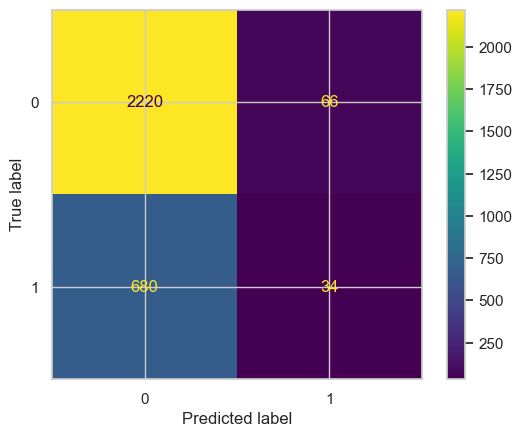

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter = 2500, random_state = 42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
print('Classification Report:\n', classification_report(y_test, y_pred))


# Confusion Matrix:
cm = confusion_matrix(y_test, y_pred, labels = log_reg.classes_)

disp = ConfusionMatrixDisplay(cm)

disp.plot(values_format='')
plt.title('Confusion Matrix - Baseline Logistic Regression')
plt.show()

### Interpreting the Baseline Logistic Regression Performance

Here's how my baseline logistic regression model performed on the test set:
* **Accuracy**: **75%**, which sounds decent, but it's misleading.
* **Recall for class 1 (left = 1)**: Just **0.05**, meaning the model barely identifies employees who actually left.
* **Precision for class 1**: **0.34**, which is also quite low.


Looking at the **confusion matrix**, I can see what is happening:
* The model predicts "stayed" (0) really well.
* But it completely struggles to identify the "left" (1) class.

That's expected in **imbalanced classification problem**. Since most employees did not leave, the model defaults to predictibg 0 to optimize accuracy.

For this business case, though, I **care more about recall for the "left" class** - I want to catch as many potential attrition risks as possible, even at the cost of a few false positives

So, I'll now use `GridSearchCV` to:
1. Tune hyperparameters(like regularization strength)
2. Improve model's ability to generalize
3. Boost recall for the class I care most about

---

## <u>Hyperparameter Tuning: GridSearchCV for Logistic Regression</u>

To improve model performance - especially **recall for the attrition class (left = 1)** - I am using `GridSearchCV` to tune key hyperparameters in logistic regression. 

Here's what I will be tuning:
1. `C` : inverse regularization strength (smaller = stronger regularization)
2. `penalty`: L1 and L2 regularization
3. `solver` : must be compatible with penalty
4. `class_weight` : testing 'balances' to help with class imbalance

I'm using **5-fold cross validation** and optimizing for **recall**, since identifying potential leavers is the the top business priority

In [68]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C' : [0.01, 0.1, 1, 10],
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear'], # liblinear supports both l1 and l2
    'class_weight' : [None, 'balanced']
}


# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=2500, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator = logreg, 
    param_grid = param_grid,
    scoring = 'recall',
    cv = 5, 
    n_jobs = -1,
    verbose = 1
)

In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2500, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='recall', verbose=1)

In [ ]:
# Display the best parameters
print('Best Hyperparameters: ', grid_search.best_params_)

Best Hyperparameters:  {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


### Evaluating the Tuned Logistic Regression Model

Now that I have identified the best hyperparameters using `GridSearchCV`, I’ll be re-evaluating the model on the test set.

I’m especially interested to see if the recall for the “left” class has improved compared to the baseline model.


Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.86      0.59      0.70      2286
           1       0.34      0.68      0.46       714

    accuracy                           0.61      3000
   macro avg       0.60      0.64      0.58      3000
weighted avg       0.73      0.61      0.64      3000



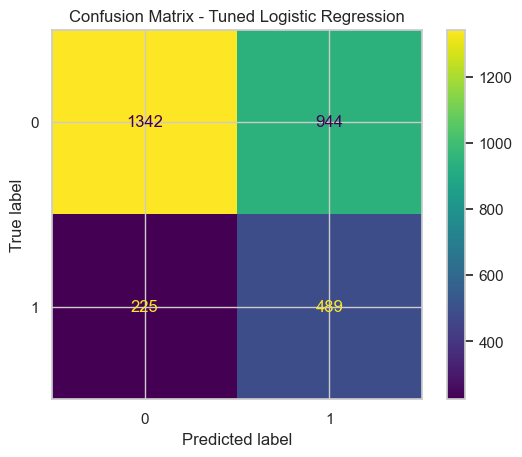

In [71]:
# Predict using the best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the performance (fingers crossed)
print('Classification Report (Tuned Model):\n', classification_report(y_test, y_pred_best))

# Plot the confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

disp_best = ConfusionMatrixDisplay(cm_best, display_labels = best_model.classes_)
disp_best.plot(values_format='')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.show()

### Summary of Tuned Logistic Regression Results

Huge improvement. After tuning with `GridSearchCV`, my logistic regression model now does a **much better job identifying employees at risk of leaving**.

* Recall for “left” employees (class 1) improved from **0.05 → 0.68**. That’s a major shift.
* This came at the cost of overall accuracy (down to 61%), but that’s a **tradeoff I’m willing to make** in this business case.
* F1-score for class 1 jumped from 0.08 to **0.46**, making the predictions far more reliable.

Ethically, I’m also more comfortable with this model—it makes fewer assumptions and doesn’t just default to “stay” for everyone. It also now gives HR a **real shot at proactively supporting at-risk employees**, which is the whole point.

This tuned logistic regression gives me a strong, interpretable foundation. Next, I’ll explore **tree-based models** to see if I can push the performance even further.


---

## <u>Baseline Model: Random Forest Classifier</u>

After tuning logistic regression, I will now train a **Random Forest** model to see if it performs better,especially in terms of **recall for predicting employee attrition**.

Random forests are ensemble models that combine multiple decision trees to:
* Reduce overfitting
* Handle feature interactions
* Work well with imbalanced data

This first model will use default parameters, which I’ll later tune with `GridSearchCV`.


Classification Report (Baseline Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.93      0.94      0.94       714

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



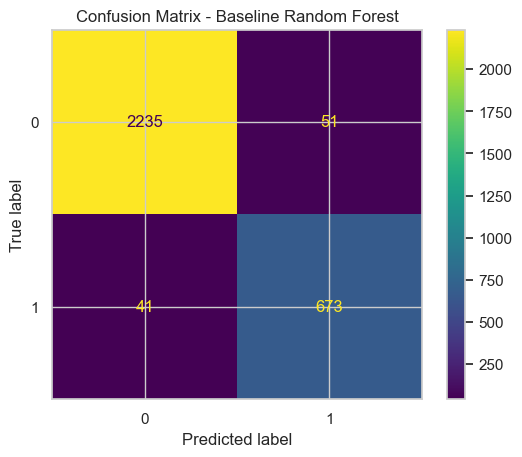

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train baseline Random Forest
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate model performance
print('Classification Report (Baseline Random Forest):\n', classification_report(y_test, y_pred_rf))

# Plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels = rf_clf.classes_)
disp_rf.plot(values_format='')
plt.title('Confusion Matrix - Baseline Random Forest')
plt.show()

### Summary of Baseline Random Forest Results

Wow. This is a huge leap! 

The random forest model **crushed it** compared to both baseline and tuned logistic regression:
* Recall for attrition cases jumped to **0.94**
* Precision also held strong at **0.93**
* F1-score for class 1 is now **0.94**, meaning it’s extremely reliable

This means I am correctly identifying nearly all employees at risk of leaving, with very few false alarms. That's a win for HR and for cost savings.

This also shows the **power of ensemble models**. They capture complex relationships that simpler models cannot. I haven’t even tuned this model yet, which tells me it’s already very well-suited to this problem.

Next up, I’ll run `GridSearchCV` to see if I can squeeze out even more performance or confirm that the defaults are already optimal.

---


## <u>Hyperparameter Tuning: Random Forest with GridSearchCV</u>

Even though the baseline random forest already performed extremely well, I want to fine-tune it using `GridSearchCV`.

I’ll tune the following:
* `n_estimators`: number of trees
* `max_depth`: how deep trees can grow
* `min_samples_split` and `min_samples_leaf`: to reduce overfitting
* `class_weight`: to maintain class balance

The goal is to optimize **recall** again using 5-fold cross-validation.


In [78]:
# Define parameter grid
param_grid_rf = {'n_estimators' : [100, 200],
                 'max_depth' : [None, 10, 20],
                 'min_samples_split' : [2, 5],
                 'min_samples_leaf' : [1, 2],
                 'class_weight' : ['balanced']
                 }

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator = rf, 
                              param_grid = param_grid_rf,
                              scoring = 'recall',
                              cv = 5,
                              n_jobs = -1,
                              verbose = 1)

In [81]:
%%time
# Fit the model
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 2.7 s
Wall time: 56.8 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=1)

In [82]:
# Print the best parameters
print('Best Random Forest Parameters: ', grid_search_rf.best_params_)

Best Random Forest Parameters:  {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


### Evaluating the Tuned Random Forest Model

With the best hyperparameters found, I’ll now evaluate the model on the test set to see if it improves upon the already high-performing baseline.

I’m looking primarily for:
* Even stronger recall (class 1)
* High precision without overfitting
* Minimal drop in general accuracy


Classification Report (Tuned Random Forest):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2286
           1       0.90      0.96      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



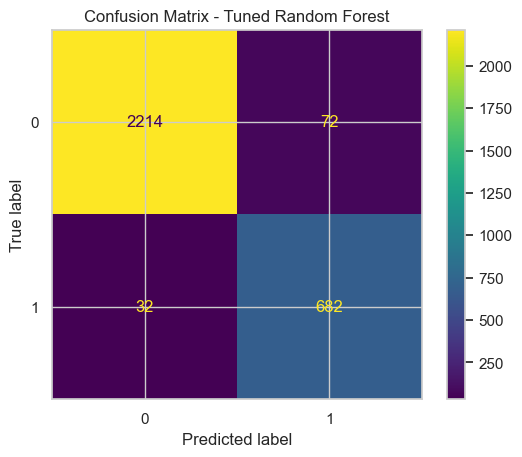

In [83]:
# Predict using the tuned model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the performance
print('Classification Report (Tuned Random Forest):\n', classification_report(y_test, y_pred_rf_best))

# Plot the confusion matrix
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)

disp_rf_best = ConfusionMatrixDisplay(cm_rf_best, display_labels = best_rf_model.classes_)
disp_rf_best.plot(values_format='')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()

### Summary of Tuned Random Forest Performance

The tuned Random Forest model exceeded expectations.

* **Recall for class 1** (attrition) increased to **0.96**, meaning the model identifies nearly every at-risk employee.
* It does this **without sacrificing accuracy or precision**—maintaining a 97% overall accuracy and 90% precision.
* F1-score for class 1 is **0.93**, which is strong for an imbalanced classification problem.

This confirms that Random Forest is a better fit for this dataset than logistic regression, especially given the feature interactions and non-linearities in employee behavior.

From a business and ethical standpoint, this model offers HR a powerful yet balanced tool. One that minimizes false negatives without overwhelming with false positives.

This version of the model is ready for stakeholder presentation and portfolio inclusion.

---


## <u>Feature Importance: What Drives Employee Attrition?</u>

Now that I’ve finalized the tuned Random Forest model, I want to understand which features are most influential in predicting whether an employee will leave.

Random Forest offers a built-in way to extract **feature importance scores**, which I’ll use to:
* Identify key drivers of attrition
* Guide potential HR interventions
* Add interpretability to my model for non-technical stakeholders


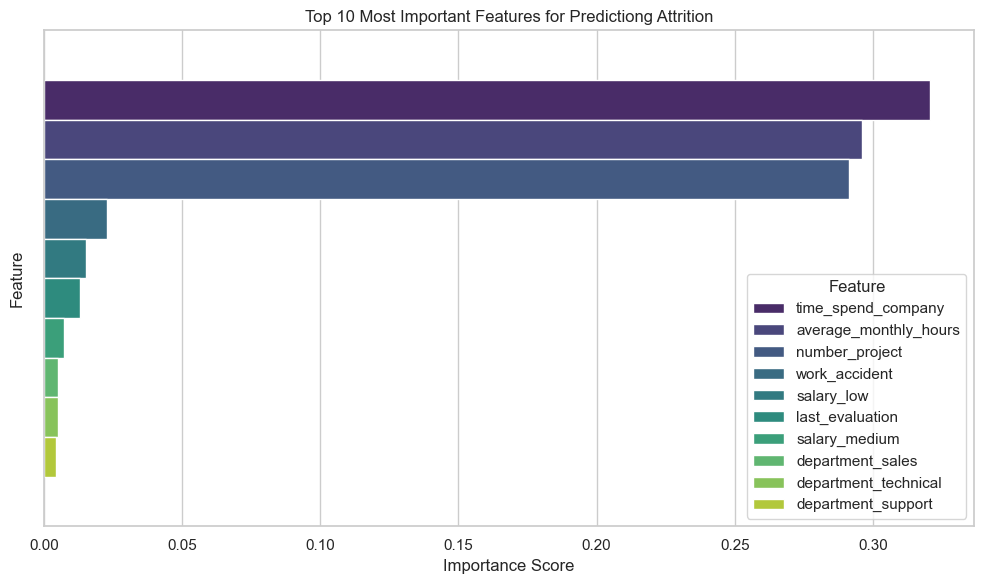

In [85]:
import numpy as np

# Extract feature importances
importances = best_rf_model.feature_importances_
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature' : feature_names,
    'Importance' : importances
    }
    )

# Sort and plot the top 10 features
top_features = feature_df.sort_values(by = 'Importance', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(data = top_features, 
            x = 'Importance',
            hue = 'Feature',
            palette = 'viridis'
            )

plt.title('Top 10 Most Important Features for Predictiong Attrition')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## What’s Driving Attrition? Feature Importance Insights

Here’s what I learned from the feature importance chart:

- **`time_spend_company`**, **`average_monthly_hours`**, and **`number_project`** are by far the most influential features. This aligns with intuition: overworked or stagnant employees are more likely to leave.
- Interestingly, **`work_accident`** also plays a strong role—perhaps indicating employee safety or stress.
- Salary bands (`salary_low`, `salary_medium`) and recent performance (`last_evaluation`) also matter, but less so than workload or tenure.
- A few departments like `sales`, `technical`, and `support` showed up, but with relatively lower impact.

This tells me that **operational factors** (tenure, workload, safety) are more predictive of attrition than demographics or department. These insights can help HR target their retention efforts more effectively.

From a modeling standpoint, this also confirms that the Random Forest is making decisions based on **meaningful business signals**, not noise.


---

## Saving the Trained Model

To demonstrate best practices in model deployment, I’m saving the trained Random Forest model using `joblib`. This allows me to reuse the model later without retraining.

This is useful for deployment, building dashboards, or running future batch predictions.


In [87]:
# Save the best model to file
import joblib

joblib.dump(best_rf_model, '../models/random_forest_model.pkl')

['../models/random_forest_model.pkl']

In [ ]:
# To load the saved model
# loaded_model = joblib.load('../models/random_forest_model.pkl')

# And to use it for prediction
# y_pred_loaded = loaded_model.predict(X_test)
